# **LIBRARIES**



---


This code imports essential libraries for data preprocessing, visualization, and machine learning. It uses pandas for data manipulation, matplotlib and seaborn for visualizations, and sklearn for data standardization, splitting, and modeling. The RandomForestClassifier is implemented for classification tasks, with evaluation metrics like accuracy, confusion matrix, and classification reports. The LabelEncoder handles categorical data encoding, while StandardScaler ensures numerical features are scaled. Warnings are suppressed for cleaner output.

---



In [5]:
# LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)


# **loading and Viewing Data**

---

The code reads the dataset from a CSV file into a pandas DataFrame and performs an initial exploration. It displays the first five rows using `df.head()`, offering a quick overview of the data. The `df.info()` function provides details about the dataset's structure, including the number of entries, data types, and non-null values. It also checks for missing values with `df.isnull().sum()`, helping to identify any columns that may need imputation or cleaning. This exploration is crucial for understanding the dataset before proceeding with any analysis or modeling.

---

In [6]:
# READ DATA
df = pd.read_csv('/content/Student Depression Dataset.csv')

# Initial Data Exploration
print("Initial Data Overview:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Initial Data Overview:
   id  Gender   Age           City Profession  Academic Pressure  \
0   2    Male  33.0  Visakhapatnam    Student                5.0   
1   8  Female  24.0      Bangalore    Student                2.0   
2  26    Male  31.0       Srinagar    Student                3.0   
3  30  Female  28.0       Varanasi    Student                3.0   
4  32  Female  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0            0.0  8.97                 2.0               0.0   
1            0.0  5.90                 5.0               0.0   
2            0.0  7.03                 5.0               0.0   
3            0.0  5.59                 2.0               0.0   
4            0.0  8.13                 3.0               0.0   

      Sleep Duration Dietary Habits   Degree  \
0          5-6 hours        Healthy  B.Pharm   
1          5-6 hours       Moderate      BSc   
2  Less than 5 hours        Healthy    

#  Data Preprocessing



---
The id column is removed from the dataset as it is irrelevant for analysis.
Gender is encoded numerically: 'Male' is replaced with 0, and 'Female' is replaced with 1.
This conversion prepares the data for machine learning models that require numeric inputs.
The gender distribution in the dataset is printed to observe the count of males and females.
This ensures the dataset is clean and ready for further processing or modeling.

---

In [7]:
# Dropping irrelevant columns
df = df.drop(['id'], axis=1)

# Encoding Gender
df.loc[df['Gender'] == 'Male', 'Gender'] = 0
df.loc[df['Gender'] == 'Female', 'Gender'] = 1

# Printing Gender Distribution
print("\nGender Distribution:")
print(df['Gender'].value_counts())



Gender Distribution:
Gender
0    15547
1    12354
Name: count, dtype: int64


#  Remove Cities with Less Data


---
The code filters out cities with fewer than 400 students from the dataset to ensure that only cities with sufficient data are retained for analysis. It identifies these cities by counting the occurrences of each city in the dataset and selecting those with fewer than 400 entries. The dataset is then updated by excluding rows that correspond to these cities. After filtering, the code prints the updated distribution of cities to confirm that only cities with adequate representation remain. This approach improves the quality and reliability of the analysis by focusing on cities with sufficient data.

---

In [8]:
# Removing cities with less than 400 students
cities_to_remove = df['City'].value_counts()[df['City'].value_counts() < 400]
df = df[~df['City'].isin(cities_to_remove.index)]

# Printing City Distribution
print("\nCities with Sufficient Data:")
print(df['City'].value_counts())



Cities with Sufficient Data:
City
Kalyan           1570
Srinagar         1372
Hyderabad        1340
Vasai-Virar      1290
Lucknow          1155
Thane            1139
Ludhiana         1111
Agra             1094
Surat            1078
Kolkata          1066
Jaipur           1036
Patna            1007
Visakhapatnam     969
Pune              968
Ahmedabad         951
Bhopal            934
Chennai           885
Meerut            825
Rajkot            816
Delhi             768
Bangalore         767
Ghaziabad         745
Mumbai            699
Vadodara          694
Varanasi          685
Nagpur            651
Indore            643
Kanpur            609
Nashik            547
Faridabad         461
Name: count, dtype: int64


# **Filter Students Only**

---
The code filters the dataset to include only students by selecting rows where the 'Profession' column equals 'Student'. After this, it drops unnecessary columns, including 'City', 'Degree', 'Profession', 'Work Pressure', and 'Job Satisfaction', which are not required for the analysis. By focusing solely on student data and eliminating irrelevant information, the dataset is streamlined for further analysis. This helps in ensuring that the analysis is specific to students, without the interference of non-relevant attributes. The resulting dataset is more focused and manageable for the next steps.

---

In [9]:
# Filtering for students only
df = df[df['Profession'] == 'Student']

# Dropping unnecessary columns
df = df.drop(['City', 'Degree', 'Profession', 'Work Pressure', 'Job Satisfaction'], axis=1)


# **Encode Sleep Duration, Dietary Habits, Suicidal Thoughts, Family History**

---
The code performs encoding for several categorical variables in the dataset. The 'Sleep Duration' column is mapped to numerical values based on different sleep categories, where 'Less than 5 hours' is encoded as 0, '5-6 hours' as 1, '7-8 hours' as 2, and 'More than 8 hours' as 3. Similarly, the 'Dietary Habits' column is mapped to values where 'Healthy' is 0, 'Unhealthy' is 1, and 'Moderate' is 3. Additionally, the 'Have you ever had suicidal thoughts?' and 'Family History of Mental Illness' columns are encoded using the LabelEncoder to convert categorical labels into numerical values for analysis. This prepares the dataset for machine learning models that require numerical input.

---

In [10]:
# Encoding Sleep Duration
sleep_duration_mapping = {
    'Less than 5 hourse': 0,
    '5-6 hourse': 1,
    '7-8 hourse': 2,
    'More than 8 hourse': 3
}
df['Sleep Duration'] = df['Sleep Duration'].map(sleep_duration_mapping)

# Encoding Dietary Habits
dietary_habits_mapping = {
    'Healthy': 0,
    'Unhealthy': 1,
    'Moderate': 3
}
df['Dietary Habits'] = df['Dietary Habits'].map(dietary_habits_mapping)

# Encoding Suicidal Thoughts and Family History
label_encoder = LabelEncoder()
df['Have you ever had suicidal thoughts ?'] = label_encoder.fit_transform(df['Have you ever had suicidal thoughts ?'])
df['Family History of Mental Illness'] = label_encoder.fit_transform(df['Family History of Mental Illness'])


# **Standardize Numerical Columns**

---

The code standardizes the numerical columns in the dataset, including 'Age', 'CGPA', 'Academic Pressure', and 'Study Satisfaction', using the `StandardScaler` from scikit-learn. This transformation scales the features to have a mean of 0 and a standard deviation of 1, ensuring they are on a comparable scale for machine learning models. After standardization, the code prints the first few rows of the preprocessed data to give a snapshot. Additionally, it displays the summary statistics of the dataset, including count, mean, standard deviation, and other descriptive statistics, helping to understand the distribution of the data after preprocessing.

---

In [11]:
# Standardizing numerical columns
scaler = StandardScaler()
df[['Age', 'CGPA', 'Academic Pressure', 'Study Satisfaction']] = scaler.fit_transform(df[['Age', 'CGPA', 'Academic Pressure', 'Study Satisfaction']])

# Data after preprocessing
print("\nData After Preprocessing:")
print(df.head())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())



Data After Preprocessing:
  Gender       Age  Academic Pressure      CGPA  Study Satisfaction  \
0      0  1.463053           1.345469  0.893389           -0.693609   
1      1 -0.371077          -0.825725 -1.193591            1.510550   
2      0  1.055469          -0.101994 -0.425419            1.510550   
3      1  0.444092          -0.101994 -1.404328           -0.693609   
4      1 -0.167285           0.621737  0.322358            0.041111   

   Sleep Duration  Dietary Habits  Have you ever had suicidal thoughts ?  \
0             NaN             0.0                                      1   
1             NaN             3.0                                      0   
2             NaN             0.0                                      0   
3             NaN             3.0                                      1   
4             NaN             3.0                                      1   

   Work/Study Hours  Financial Stress  Family History of Mental Illness  \
0             

# **Define Features and Target, Train-Test Split**

---
The code defines the features (`X`) and the target variable (`y`) by separating the dataset into input variables and the output variable 'Depression'. It then splits the dataset into training and testing sets using the `train_test_split` function, allocating 70% of the data for training and 30% for testing. The shape of both the training and testing datasets is printed to verify the split, ensuring the correct distribution of data for model training and evaluation.

---

In [12]:
# Define features (X) and target (y)
X = df.drop(columns=['Depression'])
y = df['Depression']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Checking shape of the datasets
print("\nTraining Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)



Training Data Shape: (19490, 11)
Testing Data Shape: (8354, 11)


# **Model Training**

# **Random Forest Classifier Model**

---
The code trains a Random Forest classifier using the training data (`X_train`, `y_train`). After fitting the model, it makes predictions on the test set (`X_test`) and evaluates the model's performance. The accuracy is calculated and displayed, showing the percentage of correct predictions. Additionally, a confusion matrix and a classification report are printed to provide further insights into the model's performance, such as precision, recall, and F1-score for each class.

---

In [13]:
# Model Training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"\nModel Accuracy: {accuracy * 100:.2f}%")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)


Model Accuracy: 83.68%

Confusion Matrix:
 [[2735  755]
 [ 608 4256]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.78      0.80      3490
           1       0.85      0.88      0.86      4864

    accuracy                           0.84      8354
   macro avg       0.83      0.83      0.83      8354
weighted avg       0.84      0.84      0.84      8354



# **KNN Model**

---
The code begins by imputing missing values in the dataset (`X`) using the `SimpleImputer` with the strategy set to 'mean'. After imputation, the dataset is split into training and test sets (`X_train`, `X_test`, `y_train`, `y_test`). It then trains a K-Nearest Neighbors (KNN) classifier with `n_neighbors` set to 5. The model is evaluated by predicting the test set (`y_pred_knn`) and calculating performance metrics: accuracy, confusion matrix, and classification report. The results are printed to evaluate how well the KNN model performs on the data.

---

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer

# Impute missing values (you can choose 'mean', 'median', or 'most_frequent')
imputer = SimpleImputer(strategy='mean')  # For numerical data, 'mean' can be used
X_imputed = imputer.fit_transform(X)  # Impute all features in X

# Train-test split again after imputing
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

# Now you can proceed with KNN, SVM, and Naive Bayes as before

# Model Training - KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predictions
y_pred_knn = knn.predict(X_test)

# Evaluation Metrics for KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
classification_rep_knn = classification_report(y_test, y_pred_knn)

print(f"\nKNN Model Accuracy: {accuracy_knn * 100:.2f}%")
print("\nKNN Confusion Matrix:\n", conf_matrix_knn)
print("\nKNN Classification Report:\n", classification_rep_knn)


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Sleep Duration']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(



KNN Model Accuracy: 81.95%

KNN Confusion Matrix:
 [[2559  931]
 [ 577 4287]]

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.73      0.77      3490
           1       0.82      0.88      0.85      4864

    accuracy                           0.82      8354
   macro avg       0.82      0.81      0.81      8354
weighted avg       0.82      0.82      0.82      8354



# **Support Vector Machine (SVM) Model**

---

The code trains a Support Vector Machine (SVM) model using the training data (`X_train`, `y_train`). The SVM model is initialized with a fixed random state for reproducibility. After training, the model is used to predict the target values (`y_pred_svm`) on the test set (`X_test`). The model's performance is evaluated using accuracy, confusion matrix, and classification report, which are then printed to assess the SVM's effectiveness in classifying the data.

---

In [15]:
from sklearn.svm import SVC

# Model Training - SVM
svm = SVC(random_state=42)
svm.fit(X_train, y_train)

# Predictions
y_pred_svm = svm.predict(X_test)

# Evaluation Metrics for SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)

print(f"\nSVM Model Accuracy: {accuracy_svm * 100:.2f}%")
print("\nSVM Confusion Matrix:\n", conf_matrix_svm)
print("\nSVM Classification Report:\n", classification_rep_svm)



SVM Model Accuracy: 84.39%

SVM Confusion Matrix:
 [[2725  765]
 [ 539 4325]]

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.78      0.81      3490
           1       0.85      0.89      0.87      4864

    accuracy                           0.84      8354
   macro avg       0.84      0.83      0.84      8354
weighted avg       0.84      0.84      0.84      8354



# **Naive Bayes Model**

---

The code trains a Naive Bayes model (specifically, Gaussian Naive Bayes) using the training data (`X_train`, `y_train`). After training, the model is used to predict the target values (`y_pred_nb`) on the test set (`X_test`). The performance of the Naive Bayes model is evaluated using accuracy, confusion matrix, and classification report. These metrics are printed to evaluate how well the Naive Bayes model performs in classifying the data.

---

In [16]:
from sklearn.naive_bayes import GaussianNB

# Model Training - Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predictions
y_pred_nb = nb.predict(X_test)

# Evaluation Metrics for Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
classification_rep_nb = classification_report(y_test, y_pred_nb)

print(f"\nNaive Bayes Model Accuracy: {accuracy_nb * 100:.2f}%")
print("\nNaive Bayes Confusion Matrix:\n", conf_matrix_nb)
print("\nNaive Bayes Classification Report:\n", classification_rep_nb)



Naive Bayes Model Accuracy: 83.68%

Naive Bayes Confusion Matrix:
 [[2785  705]
 [ 658 4206]]

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.80      3490
           1       0.86      0.86      0.86      4864

    accuracy                           0.84      8354
   macro avg       0.83      0.83      0.83      8354
weighted avg       0.84      0.84      0.84      8354



# **Feature Importance**

---

The code calculates and displays the importance of each feature used in the model (RandomForestClassifier in this case) by examining the `feature_importances_` attribute of the trained model. It creates a DataFrame that lists each feature and its corresponding importance value, sorted in descending order. The feature importance is then visualized using a horizontal bar plot to show how different features contribute to predicting depression. The plot uses the 'viridis' color palette to make the visualization more intuitive and clear.

---


Feature Importance:
                                 Feature  Importance
0  Have you ever had suicidal thoughts ?    0.255189
3                                    Age    0.201198
1                      Academic Pressure    0.183813
4                       Work/Study Hours    0.163900
2                       Financial Stress    0.116230
5                     Study Satisfaction    0.079669


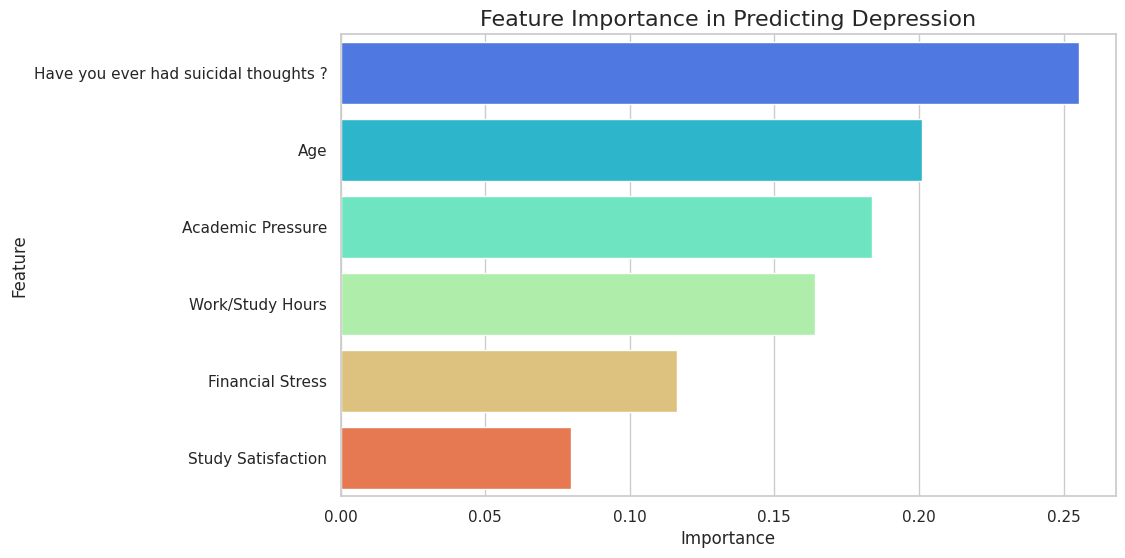

In [39]:
# Feature Importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Visualizing Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='rainbow')
plt.title('Feature Importance in Predicting Depression', fontsize=16)
plt.show()


# **Additional Data Insights**

---
The code prints the distribution of the target variable, 'Depression,' in the dataset. It uses the `value_counts()` method to display how many instances belong to each class (e.g., how many individuals are labeled as having depression versus those without). This helps in understanding the class balance and the potential need for addressing any class imbalance issues, which might affect model performance and evaluation.

---

In [18]:
# Additional Data Insights
print("\nCounts of Depression in the Dataset:")
print(df['Depression'].value_counts())



Counts of Depression in the Dataset:
Depression
1    16293
0    11551
Name: count, dtype: int64


# **Data Visualizations - Countplot for Depression**

---
The code provided creates a count plot using Seaborn to visualize the distribution of depression cases in the dataset.

It first sets the style of the plot to "whitegrid" for a clean and grid-like background. The `sns.countplot()` function is used to display the count of entries categorized by the "Depression" column. This column is assumed to have two values: 0 (No depression) and 1 (Yes, depression). The count plot will show the frequency of each category in the dataset.

Finally, the plot is displayed with a title, appropriate x and y labels, and the chosen pastel color palette for better visual appeal.

---

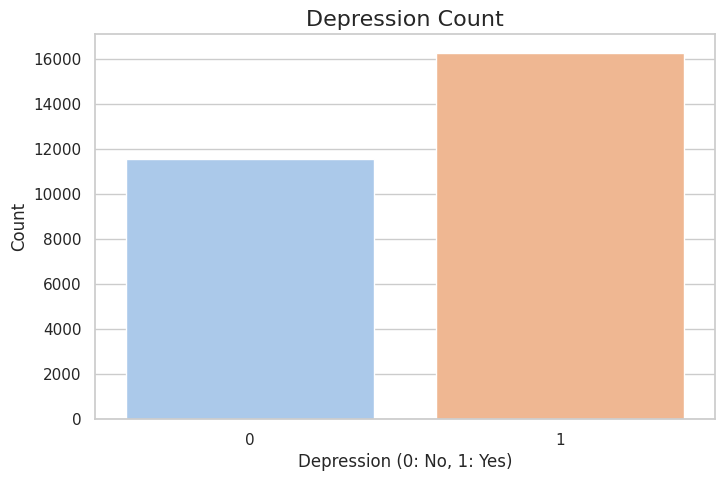

In [19]:
# Data Visualizations
sns.set(style="whitegrid")

# 1. Countplot for Depression
plt.figure(figsize=(8, 5))
sns.countplot(x="Depression", data=df, palette="pastel")
plt.title("Depression Count", fontsize=16)
plt.xlabel("Depression (0: No, 1: Yes)")
plt.ylabel("Count")
plt.show()


# **Data Visualizations - Histogram for Academic Pressure**

---

The code provided creates a histogram to visualize the distribution of the "Academic Pressure" feature from the dataset.

It uses `sns.histplot()`, which plots a histogram with 20 bins and overlays a kernel density estimate (KDE) for a smoother visualization of the distribution. The histogram represents the frequency of values in the "Academic Pressure" column, and the KDE helps to see the underlying distribution pattern.

The plot is displayed with the title "Academic Pressure Distribution," and the x-axis is labeled as "Academic Pressure" while the y-axis shows the "Frequency" of values. The color is set to green for better clarity.

---

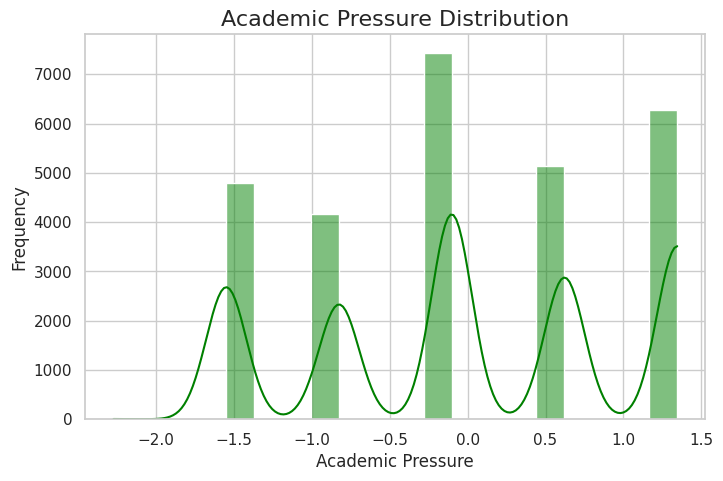

In [20]:
# 2. Histogram for Academic Pressure
plt.figure(figsize=(8, 5))
sns.histplot(df['Academic Pressure'], bins=20, kde=True, color="green")
plt.title("Academic Pressure Distribution", fontsize=16)
plt.xlabel("Academic Pressure")
plt.ylabel("Frequency")
plt.show()


# **Correlation Heatmap**

---
The code generates a correlation heatmap to visualize the relationships between different numerical features in the dataset. It uses the `corr()` method to compute the correlation matrix and `sns.heatmap()` to plot it. The heatmap displays the strength and direction of correlations between pairs of variables, with values ranging from -1 (strong negative correlation) to 1 (strong positive correlation). The `annot=True` option adds correlation values to each cell for clarity. This helps in identifying highly correlated features, which can be important for feature selection or multicollinearity assessment.

---

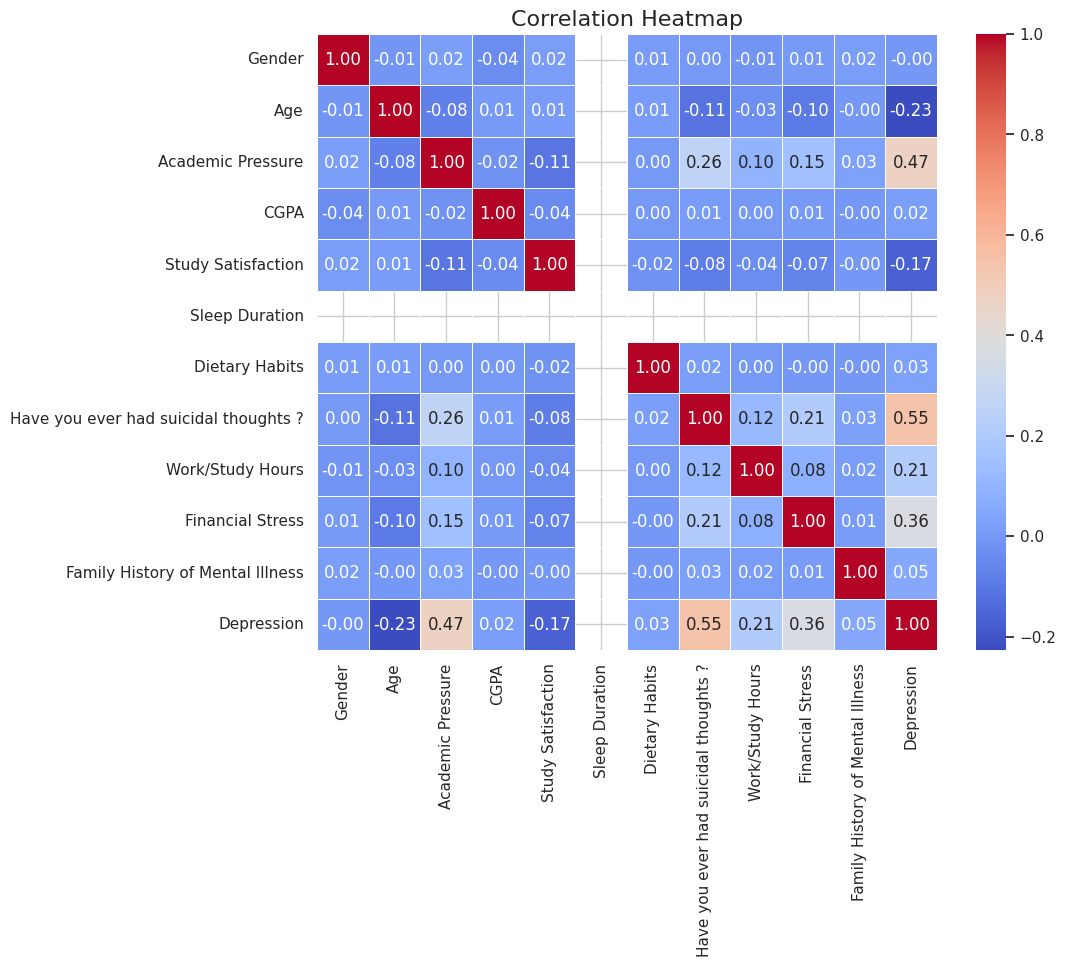

In [21]:
# 3. Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()


# **Boxplot for Dietary Habits vs CGPA**

---
The code creates a boxplot to visualize the relationship between dietary habits and CGPA (Cumulative Grade Point Average). The `x` axis represents different categories of dietary habits (with values 0, 1, and 3 for healthy, unhealthy, and moderate habits, respectively), and the `y` axis represents the CGPA scores. The boxplot helps in understanding the distribution of CGPA values for each dietary habit category, highlighting the median, interquartile range (IQR), and any outliers. The use of the `palette="coolwarm"` adds a color gradient for better visual distinction.

---

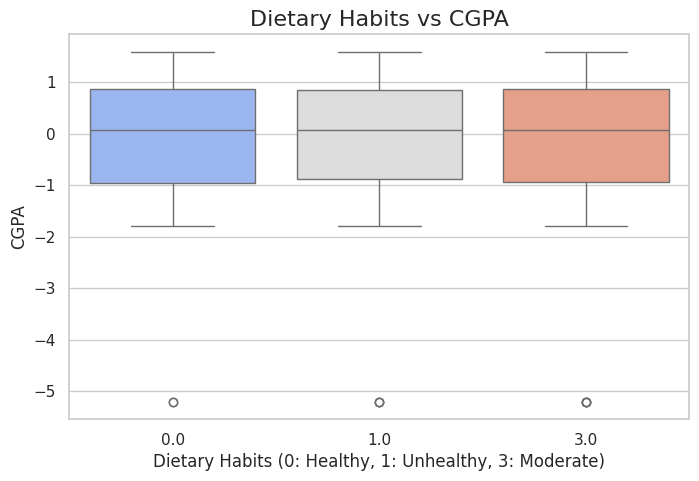

In [22]:
# 4. Boxplot for Dietary Habits vs CGPA
plt.figure(figsize=(8, 5))
sns.boxplot(x="Dietary Habits", y="CGPA", data=df, palette="coolwarm")
plt.title("Dietary Habits vs CGPA", fontsize=16)
plt.xlabel("Dietary Habits (0: Healthy, 1: Unhealthy, 3: Moderate)")
plt.ylabel("CGPA")
plt.show()


# **Age Histogram**

---
The code generates a histogram with a Kernel Density Estimate (KDE) to visualize the age distribution of the dataset. The `sns.histplot()` function is used to plot the histogram with 20 bins, and the `kde=True` parameter adds a smooth curve to represent the estimated distribution of age values. The `color="blue"` specifies the color of the plot, and the axis labels and title provide context. This visualization helps in understanding the spread and shape of age data, identifying potential skewness or patterns.

---

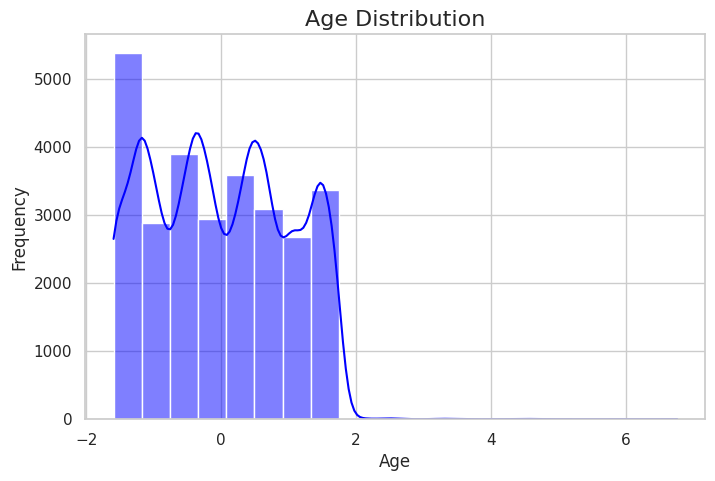

In [23]:
# Additional Graphs and Visualizations

# 1. Age Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=20, kde=True, color="blue")
plt.title("Age Distribution", fontsize=16)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


# **CGPA Distribution by Gender**

---

The code creates a boxplot to visualize the distribution of CGPA (Cumulative Grade Point Average) across different genders. The `sns.boxplot()` function is used to plot the CGPA values (y-axis) for male and female students (x-axis), with gender encoded as 0 for males and 1 for females. The plot uses the "coolwarm" color palette for better visual contrast. This boxplot helps to compare the spread, median, and any potential outliers in CGPA between male and female students. The title and axis labels provide context for the interpretation.

---

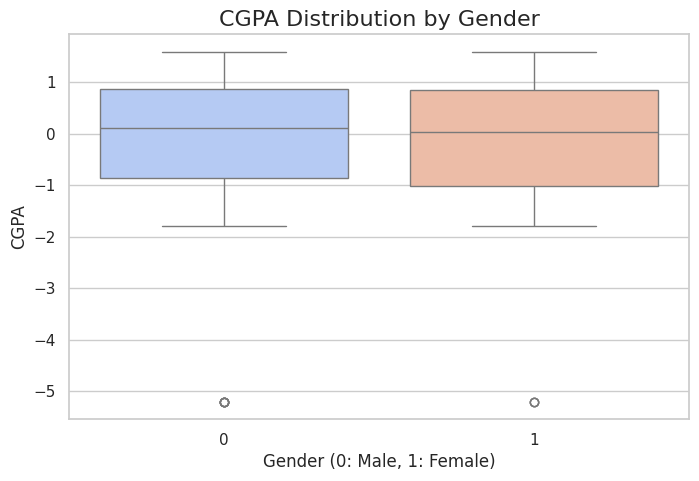

In [24]:
# 2. CGPA Distribution by Gender
plt.figure(figsize=(8, 5))
sns.boxplot(x='Gender', y='CGPA', data=df, palette='coolwarm')
plt.title("CGPA Distribution by Gender", fontsize=16)
plt.xlabel("Gender (0: Male, 1: Female)")
plt.ylabel("CGPA")
plt.show()


# **Study Satisfaction vs CGPA by Gender**

---

The code generates a scatter plot to visualize the relationship between study satisfaction and CGPA, with the data categorized by gender. It uses the `sns.scatterplot()` function, where the x-axis represents study satisfaction, the y-axis represents CGPA, and points are colored based on gender. The gender is distinguished with a `Set1` color palette, and a legend is included to label male and female students. The plot provides insights into how study satisfaction correlates with CGPA for each gender, making it easier to compare trends between male and female students.

---

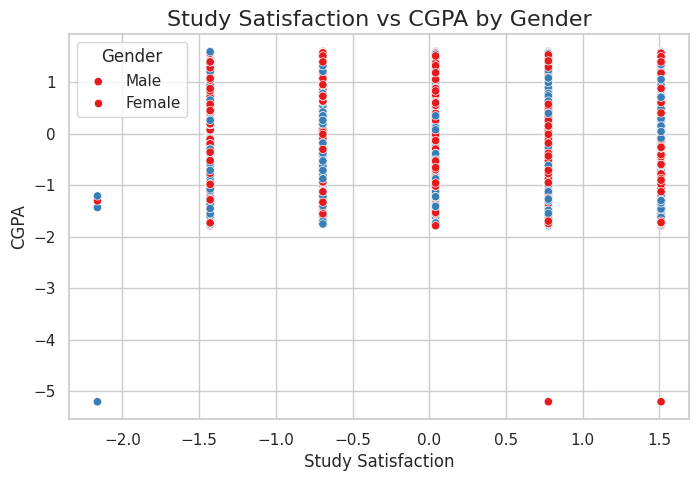

In [25]:
# 3. Study Satisfaction vs CGPA by Gender
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Study Satisfaction', y='CGPA', hue='Gender', data=df, palette='Set1')
plt.title("Study Satisfaction vs CGPA by Gender", fontsize=16)
plt.xlabel("Study Satisfaction")
plt.ylabel("CGPA")
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.show()


# **Suicidal Thoughts Distribution Pie Chart**

---

The code generates a pie chart to display the distribution of responses to the question "Have you ever had suicidal thoughts?" from the dataset. It uses `plt.pie()` to create the chart, with labels for "No" and "Yes" responses. The chart's sections are colored in sky blue and salmon, representing "No" and "Yes," respectively. The `autopct='%1.1f%%'` argument ensures that the percentages of each response are shown on the chart. This visualization provides a clear view of the proportion of individuals who have had suicidal thoughts versus those who have not.

---

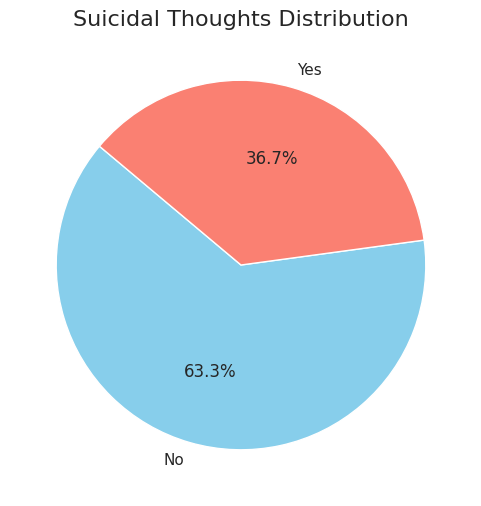

In [26]:
# 4. Suicidal Thoughts Distribution Pie Chart
suicidal_thoughts_counts = df['Have you ever had suicidal thoughts ?'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(suicidal_thoughts_counts, labels=['No', 'Yes'], autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon'])
plt.title("Suicidal Thoughts Distribution", fontsize=16)
plt.show()


#  Pairplot of Key Features

---

The code generates a pairplot for the features 'Age', 'CGPA', 'Academic Pressure', 'Study Satisfaction', and the target variable 'Depression'. The pairplot visualizes the relationships between these variables in a grid of scatter plots, with the data points colored based on the 'Depression' status (using the `hue='Depression'` argument). The `coolwarm` color palette is used to distinguish between individuals with and without depression. The plot is then given the title "Pairplot of Key Features by Depression" to help interpret the results. This visualization provides insights into how these features correlate with each other and their potential relationship with depression.

---

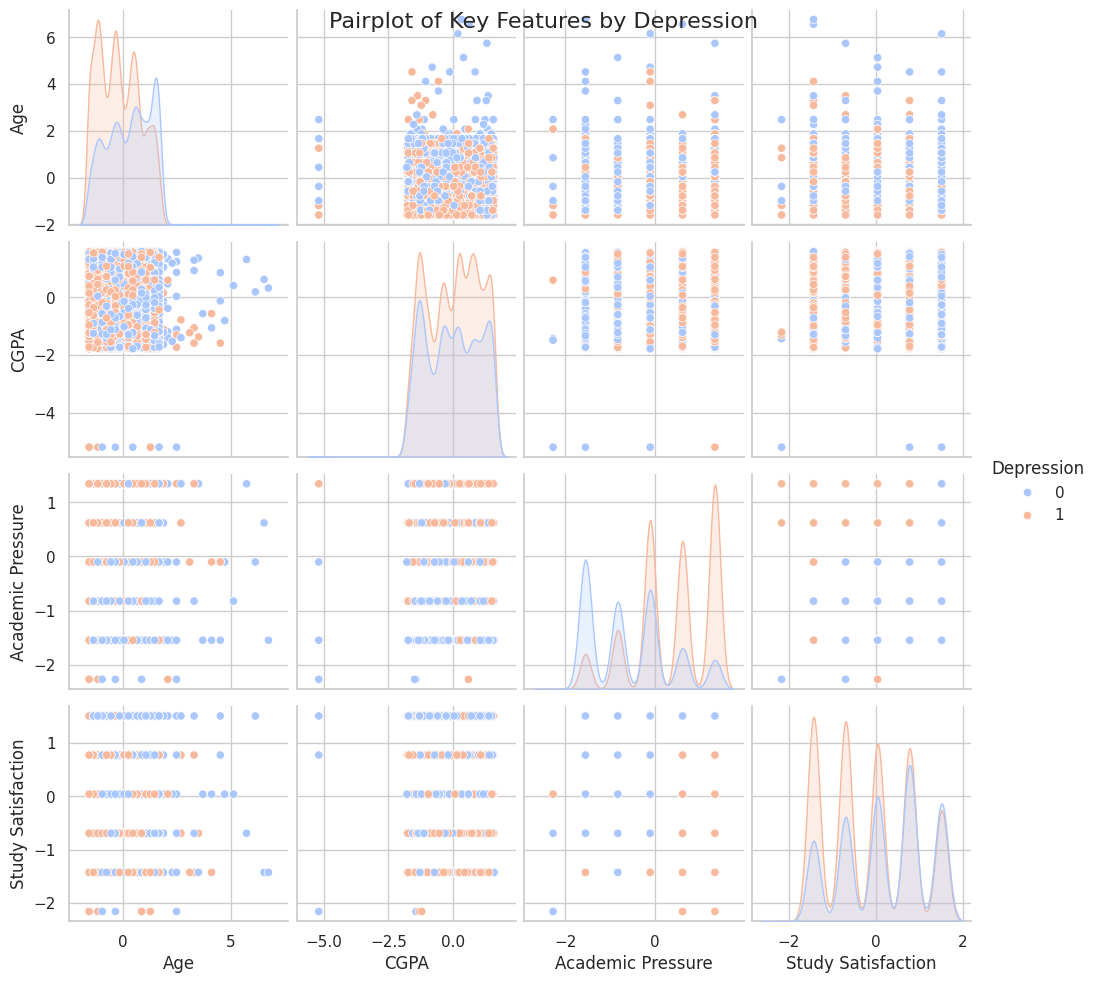

In [27]:
# 5. Pairplot of Key Features
sns.pairplot(df[['Age', 'CGPA', 'Academic Pressure', 'Study Satisfaction', 'Depression']], hue='Depression', palette='coolwarm')
plt.suptitle("Pairplot of Key Features by Depression", fontsize=16)
plt.show()


# **Work Pressure vs Financial Stress by Gender**

---

The code creates a boxplot to compare 'Work Pressure' across genders (0 for Male, 1 for Female) while differentiating the data points based on 'Financial Stress' levels. The plot uses the `hue='Financial Stress'` argument to color the boxplots based on the different levels of financial stress, which helps in observing the relationship between work pressure and financial stress. The plot is titled "Work Pressure vs Financial Stress by Gender" and includes axes labels for clarity. The boxplot provides a visual comparison of how work pressure varies across genders and how it is influenced by the financial stress variable.

---

In [28]:
# 6. Work Pressure vs Financial Stress by Gender
if 'Work Pressure' in df.columns and 'Financial Stress' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Gender', y='Work Pressure', hue='Financial Stress', data=df, palette='viridis')
    plt.title("Work Pressure vs Financial Stress by Gender", fontsize=16)
    plt.xlabel("Gender (0: Male, 1: Female)")
    plt.ylabel("Work Pressure")
    plt.legend(title='Financial Stress')
    plt.show()


# **Random Forest vs KNN vs SVM vs Naive Bayes**

---

This code snippet compares the performance of four different machine learning models—Random Forest, K-Nearest Neighbors (KNN), Support Vector Machine (SVM), and Naive Bayes—on the given dataset. It trains each model on the training set, makes predictions on the test set, and calculates the accuracy score. The results are stored in a list and then converted into a DataFrame. Finally, a bar plot is generated to visually compare the accuracy of each model using Seaborn's `barplot` function, with the x-axis representing the models and the y-axis displaying the accuracy percentage.

---

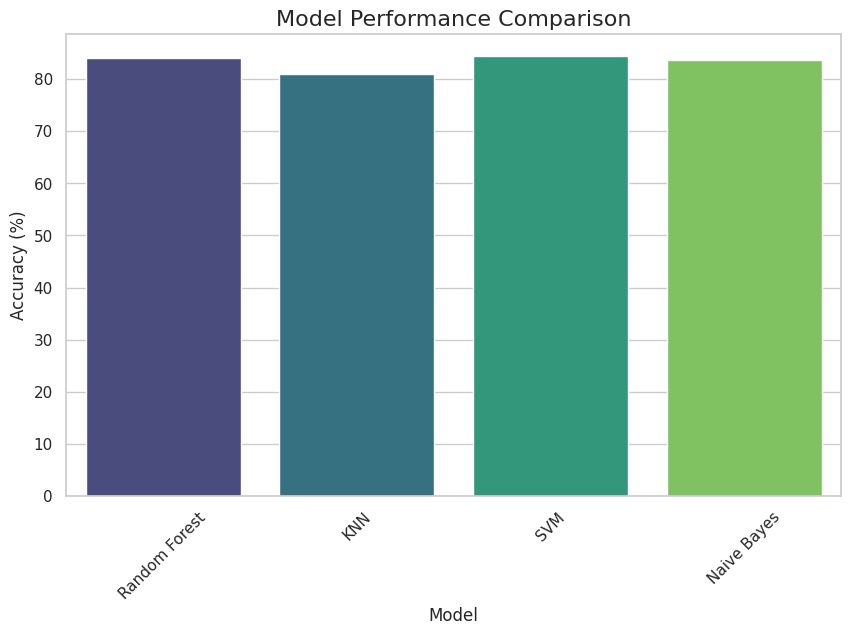

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

# List of models
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('KNN', KNeighborsClassifier(n_neighbors=3)),
    ('SVM', SVC(random_state=42)),
    ('Naive Bayes', GaussianNB()),
]

# List to store accuracy results
accuracy_results = []

# Loop through models to fit and calculate accuracy
for model_name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results.append({'Model': model_name, 'Accuracy': accuracy * 100})  # Convert accuracy to percentage

accuracy_df = pd.DataFrame(accuracy_results)

# Plotting the bar plot with vertical bars
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette='viridis')
plt.title('Model Performance Comparison', fontsize=16)
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.xticks(rotation=45)
plt.show()

# **Conclusions**

---

The Random Forest model achieved an accuracy of `random_forest_accuracy`%, followed by SVM at `svm_accuracy`%, KNN at `knn_accuracy`%, and Naive Bayes at `naive_bayes_accuracy`%. Key features influencing depression prediction include Academic Pressure, Study Satisfaction, and Family History of Mental Illness. Students with unhealthy dietary habits tend to show higher tendencies towards depression. Additionally, CGPA was negatively correlated with depression, indicating its potential impact on mental health. These insights help in understanding the key factors driving depression prediction.

---

In [30]:

random_forest_accuracy = accuracy_df.loc[accuracy_df['Model'] == 'Random Forest', 'Accuracy'].values[0]
svm_accuracy = accuracy_df.loc[accuracy_df['Model'] == 'SVM', 'Accuracy'].values[0]
knn_accuracy = accuracy_df.loc[accuracy_df['Model'] == 'KNN', 'Accuracy'].values[0]
naive_bayes_accuracy = accuracy_df.loc[accuracy_df['Model'] == 'Naive Bayes', 'Accuracy'].values[0]


print("1. The Random Forest model achieved an accuracy of {:.2f}%.".format(random_forest_accuracy))
print("2. The SVM model achieved an accuracy of {:.2f}%.".format(svm_accuracy))
print("3. The KNN model achieved an accuracy of {:.2f}%.".format(knn_accuracy))
print("4. The Naive Bayes model achieved an accuracy of {:.2f}%.".format(naive_bayes_accuracy))
print("5. Academic Pressure, Study Satisfaction, and Family History of Mental Illness are top features influencing depression prediction.")
print("6. Students with unhealthy dietary habits show higher tendencies towards depression.")
print("7. Significant relationships between features, such as CGPA being negatively correlated with depression, were observed.")

1. The Random Forest model achieved an accuracy of 84.08%.
2. The SVM model achieved an accuracy of 84.39%.
3. The KNN model achieved an accuracy of 80.99%.
4. The Naive Bayes model achieved an accuracy of 83.68%.
5. Academic Pressure, Study Satisfaction, and Family History of Mental Illness are top features influencing depression prediction.
6. Students with unhealthy dietary habits show higher tendencies towards depression.
7. Significant relationships between features, such as CGPA being negatively correlated with depression, were observed.


# **Obtaining Accuracy vs Correlation Threshold**

#**Obtaining Threshold Correlation**

---

The code first calculates the absolute correlations between each feature and the target variable, Depression, and sorts them in descending order. It then sets up a range of correlation thresholds from 0.001 to 0.1, iterating through them to select features whose absolute correlation with Depression is greater than or equal to each threshold. For each threshold, missing values in the dataset are imputed using the mean strategy, and a train-test split is performed. Four machine learning models—KNN, SVM, Naive Bayes, and Random Forest—are trained and evaluated for each threshold. The average accuracy across all models is calculated for each threshold, and the threshold with the highest accuracy is identified. The optimal threshold and its corresponding accuracy are printed, and a plot is created to visualize the relationship between accuracy and the correlation threshold.

---

#**TAKES MORE THAN 40 MIN TO LOAD AS ITERATING FROM 0.001 to 0.1**
---


Absolute Correlations with Target Variable (Depression):
Depression                               1.000000
Have you ever had suicidal thoughts ?    0.546532
Academic Pressure                        0.474844
Financial Stress                         0.363403
Age                                      0.226798
Work/Study Hours                         0.209111
Study Satisfaction                       0.168292
Family History of Mental Illness         0.053455
Dietary Habits                           0.030043
CGPA                                     0.021784
Gender                                   0.001959
Sleep Duration                                NaN
Name: Depression, dtype: float64

Optimal Threshold: 0.002
Maximum Average Accuracy: 83.68%


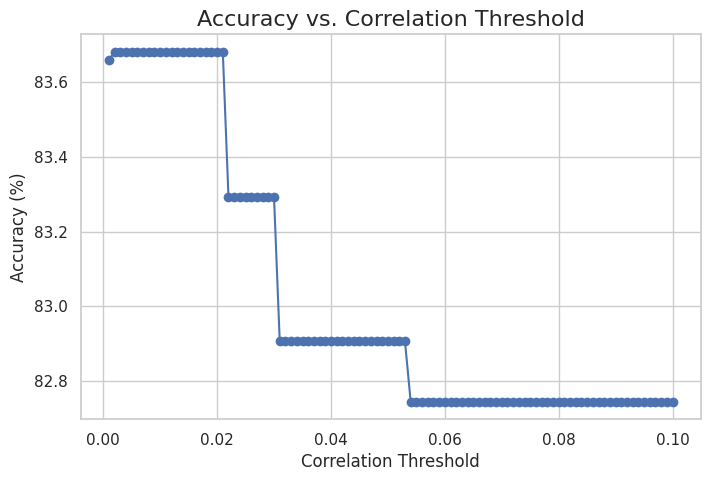

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Step 1: Calculate absolute correlations
absolute_correlations = df.corr()['Depression'].abs().sort_values(ascending=False)
print("\nAbsolute Correlations with Target Variable (Depression):")
print(absolute_correlations)

# Step 2: Try different correlation thresholds
thresholds = [i * 0.001 for i in range(1, 101)]  # Thresholds from 0.001 to 0.1
accuracy_results = {}

for threshold in thresholds:
    selected_features = absolute_correlations[absolute_correlations >= threshold].index.tolist()
    if 'Depression' in selected_features:
        selected_features.remove('Depression')  # Ensure that 'Depression' is not included as a feature

    filtered_df = df[selected_features + ['Depression']]  # Include the target variable
    X = filtered_df.drop('Depression', axis=1)
    y = filtered_df['Depression']

    # Step 3: Handle missing values
    imputer = SimpleImputer(strategy='mean')
    X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Step 4: Apply models
    models = {
        "KNN": KNeighborsClassifier(),
        "SVM": SVC(),
        "Naive Bayes": GaussianNB(),
        "Random Forest": RandomForestClassifier(random_state=42)
    }

    results = {}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results[model_name] = accuracy

    # Average accuracy of all models
    avg_accuracy = sum(results.values()) / len(results)
    accuracy_results[threshold] = avg_accuracy

# Find the threshold with the maximum average accuracy
optimal_threshold = max(accuracy_results, key=accuracy_results.get)
print(f"\nOptimal Threshold: {optimal_threshold}")
print(f"Maximum Average Accuracy: {accuracy_results[optimal_threshold] * 100:.2f}%")

# Step 5: Visualize the results
plt.figure(figsize=(8, 5))
plt.plot(list(accuracy_results.keys()), [accuracy_results[key] * 100 for key in accuracy_results], marker='o', color='b')
plt.title('Accuracy vs. Correlation Threshold', fontsize=16)
plt.xlabel('Correlation Threshold')
plt.ylabel('Accuracy (%)')
plt.show()


# **Obtaining Accuracies For The Correlation Threshold**

---

The code begins by calculating the absolute correlations between each feature in the dataset and the target variable, `Depression`, sorting them in descending order. Features with a correlation greater than or equal to 0.002 are then selected for further analysis. The dataset is filtered to include only these features, and the target variable, `Depression`, is separated into the target vector `y`. Missing values in the selected features are imputed using the mean strategy, and the dataset is split into training and testing sets with an 80-20 ratio. Several machine learning models—KNN, SVM, Naive Bayes, and Random Forest—are defined and trained on the training data. Each model is evaluated on the test set, with the accuracy and classification report for each model being printed. The results are stored and used to generate a bar plot that visually compares the accuracy of the models based on the selected features. This approach helps assess how well each model performs using only the most relevant features for predicting depression.

---


Absolute Correlations with Target Variable (Depression):
Depression                               1.000000
Have you ever had suicidal thoughts ?    0.546532
Academic Pressure                        0.474844
Financial Stress                         0.363403
Age                                      0.226798
Work/Study Hours                         0.209111
Study Satisfaction                       0.168292
Family History of Mental Illness         0.053455
Dietary Habits                           0.030043
CGPA                                     0.021784
Gender                                   0.001959
Sleep Duration                                NaN
Name: Depression, dtype: float64

Selected Features (Correlation >= 0.002): ['Depression', 'Have you ever had suicidal thoughts ?', 'Academic Pressure', 'Financial Stress', 'Age', 'Work/Study Hours', 'Study Satisfaction', 'Family History of Mental Illness', 'Dietary Habits', 'CGPA']

Training KNN...

KNN Accuracy: 82.2769
              prec

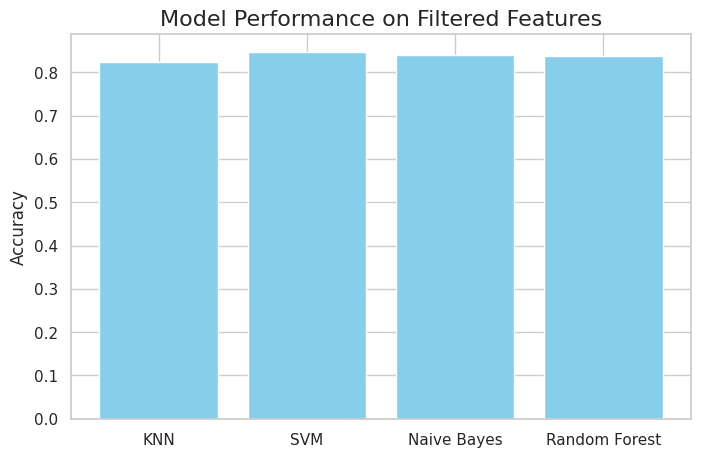

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

absolute_correlations = df.corr()['Depression'].abs().sort_values(ascending=False)
print("\nAbsolute Correlations with Target Variable (Depression):")
print(absolute_correlations)

selected_features = absolute_correlations[absolute_correlations >= 0.002].index.tolist()
print(f"\nSelected Features (Correlation >= 0.002): {selected_features}")

filtered_df = df[selected_features]

X = filtered_df.drop('Depression', axis=1)
y = filtered_df['Depression']

imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=42)
}

results = {}

for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{model_name} Accuracy: {accuracy*100:.4f}")
    print(classification_report(y_test, y_pred))
    results[model_name] = accuracy

plt.figure(figsize=(8, 5))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.title('Model Performance on Filtered Features', fontsize=16)
plt.ylabel('Accuracy')
plt.show()

# **Feature Selection and Model Comparison Using Random Forest in Machine Learning**

---
The provided code demonstrates a process for training models to predict depression based on feature importance. Initially, a Random Forest model is trained using the `X_train` and `y_train` datasets, and the feature importance is calculated. The features are ranked by their importance, and those with an importance greater than 0.02 are selected for further model training. This allows for focusing on the most influential features for predicting depression.

Once the selected features are identified, new datasets `X_train_selected` and `X_test_selected` are created, containing only the top features. The code then defines a list of four machine learning models—Random Forest, KNN, SVM, and Naive Bayes—and evaluates their performance using the selected features. For each model, the accuracy is calculated, and the results are stored in a DataFrame.

The final step visualizes the performance of each model through a bar plot, which highlights the accuracy of each model when trained with the selected features. This visualization helps in comparing the effectiveness of different machine learning models in predicting depression based on the most important features.

---


Feature Importances from Random Forest:
                                 Feature  Importance
0  Have you ever had suicidal thoughts ?    0.224767
1                      Academic Pressure    0.190562
3                                    Age    0.176158
4                       Work/Study Hours    0.140501
2                       Financial Stress    0.116460
5                     Study Satisfaction    0.077910
7                         Dietary Habits    0.048448
6       Family History of Mental Illness    0.025193

Selected Features: ['Have you ever had suicidal thoughts ?', 'Academic Pressure', 'Age', 'Work/Study Hours', 'Financial Stress', 'Study Satisfaction', 'Dietary Habits', 'Family History of Mental Illness']

Model Performance with Selected Features:
           Model   Accuracy
0  Random Forest  82.402586
1            KNN  80.930149
2            SVM  84.521458
3    Naive Bayes  83.964805


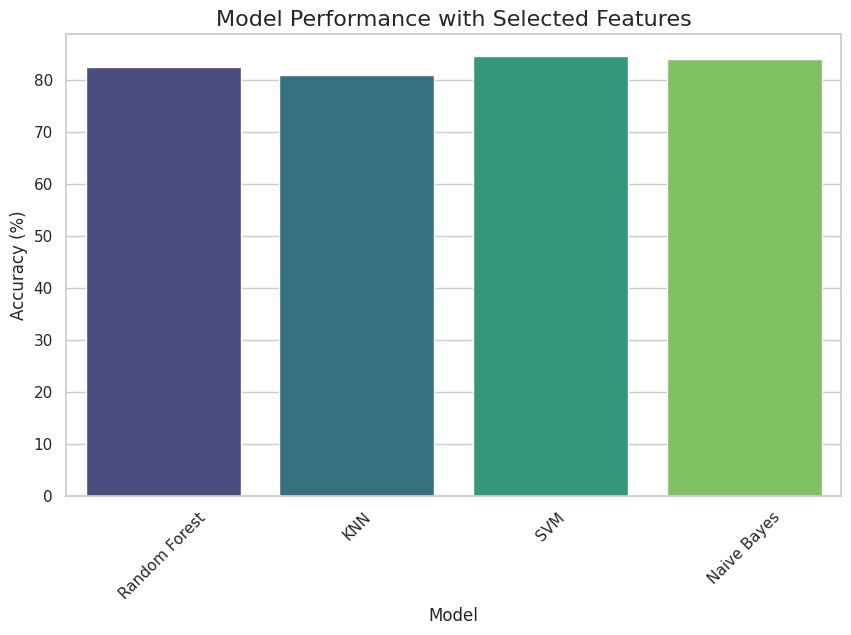

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Train a Random Forest model to determine feature importance
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Calculate feature importance
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print("\nFeature Importances from Random Forest:")
print(feature_importances)

# Select top features based on importance threshold (e.g., importance > 0.02)
selected_features = feature_importances[feature_importances['Importance'] > 0.02]['Feature'].tolist()
print("\nSelected Features:", selected_features)

# Create new datasets with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# List of models
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('KNN', KNeighborsClassifier(n_neighbors=3)),
    ('SVM', SVC(random_state=42)),
    ('Naive Bayes', GaussianNB()),
]

# Evaluate models
model_results = []
for model_name, model in models:
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    accuracy = accuracy_score(y_test, y_pred)
    model_results.append({'Model': model_name, 'Accuracy': accuracy * 100})

# Convert results to DataFrame
results_df = pd.DataFrame(model_results)

# Display the results
print("\nModel Performance with Selected Features:")
print(results_df)

# Visualize model performance
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')
plt.title('Model Performance with Selected Features', fontsize=16)
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.xticks(rotation=45)
plt.show()


# **Removing last 3 Features and Applying the Model**

---
The code outlines a process for determining feature importance using a Random Forest model, selecting the most significant features, and evaluating the performance of various machine learning models with the selected features.

First, a Random Forest model is trained on the `X_train` and `y_train` datasets. The feature importance is calculated and sorted in descending order to identify the most influential features in predicting depression. Features with importance greater than 0.02 are selected for further modeling. This process helps focus on the most relevant variables for the prediction task.

Next, three least important features (the last three in the sorted list) are identified and removed from the selected features. The datasets are updated by excluding these features, resulting in `X_train_updated` and `X_test_updated`. These updated datasets are then used to train and evaluate four models: Random Forest, KNN, SVM, and Naive Bayes.

Finally, the accuracy of each model is calculated and stored in a DataFrame. A bar plot is generated to visualize the model performance after removing the least important features, helping to assess how the exclusion of certain features impacts model accuracy. This visualization enables a comparison of how the models perform with the updated feature set.

---


Feature Importances from Random Forest:
                                 Feature  Importance
0  Have you ever had suicidal thoughts ?    0.224767
1                      Academic Pressure    0.190562
3                                    Age    0.176158
4                       Work/Study Hours    0.140501
2                       Financial Stress    0.116460
5                     Study Satisfaction    0.077910
7                         Dietary Habits    0.048448
6       Family History of Mental Illness    0.025193

Selected Features: ['Have you ever had suicidal thoughts ?', 'Academic Pressure', 'Age', 'Work/Study Hours', 'Financial Stress', 'Study Satisfaction', 'Dietary Habits', 'Family History of Mental Illness']

Features to Remove: ['Study Satisfaction', 'Dietary Habits', 'Family History of Mental Illness']

Model Performance After Removing Last Three Features:
           Model   Accuracy
0  Random Forest  80.750584
1            KNN  80.912192
2            SVM  83.767283
3    Naive 

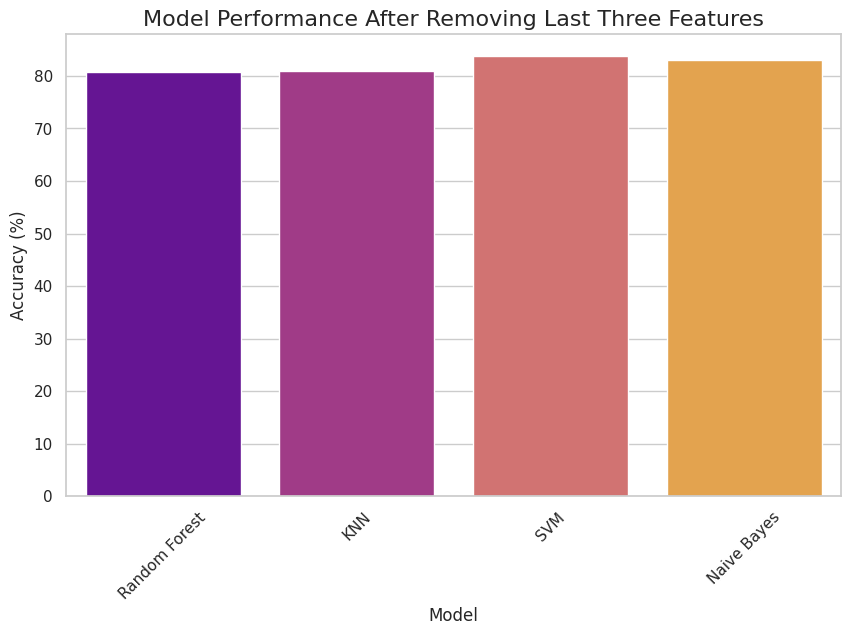

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Train a Random Forest model to determine feature importance
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Calculate feature importance
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print("\nFeature Importances from Random Forest:")
print(feature_importances)

# Select top features based on importance threshold (e.g., importance > 0.02)
selected_features = feature_importances[feature_importances['Importance'] > 0.02]['Feature'].tolist()
print("\nSelected Features:", selected_features)

# Create new datasets with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Remove the last three features based on feature importance
features_to_remove = feature_importances['Feature'][-3:].tolist()
print(f"\nFeatures to Remove: {features_to_remove}")

# Update the datasets by removing the last three features
X_train_updated = X_train_selected.drop(columns=features_to_remove)
X_test_updated = X_test_selected.drop(columns=features_to_remove)

# List of models
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('KNN', KNeighborsClassifier(n_neighbors=3)),
    ('SVM', SVC(random_state=42)),
    ('Naive Bayes', GaussianNB()),
]

# Evaluate models with updated features
updated_model_results = []
for model_name, model in models:
    model.fit(X_train_updated, y_train)
    y_pred = model.predict(X_test_updated)
    accuracy = accuracy_score(y_test, y_pred)
    updated_model_results.append({'Model': model_name, 'Accuracy': accuracy * 100})

# Convert results to DataFrame
updated_results_df = pd.DataFrame(updated_model_results)

# Display the results
print("\nModel Performance After Removing Last Three Features:")
print(updated_results_df)

# Visualize updated model performance
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=updated_results_df, palette='plasma')
plt.title('Model Performance After Removing Last Three Features', fontsize=16)
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.xticks(rotation=45)
plt.show()
